In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_int_salary_19-20')

In [3]:
qbs.dtypes

NAME         object
INT           int64
INT_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,INT,INT_rank,salary
0,Cam Newton,1,4.0,20760000
1,Matt Schaub,1,4.0,1890000
2,Ben Roethlisberger,1,4.0,34000000
3,Teddy Bridgewater,2,10.0,7250000
4,Ryan Finley,2,10.0,827414


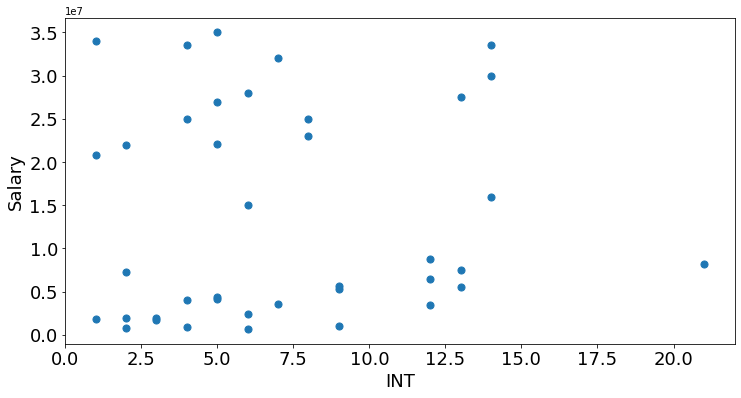

In [5]:
ax = qbs.plot(kind="scatter", x = 'INT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('INT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['INT', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 5.69345141e-17, -2.84672570e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.41473175,  1.38545973],
       [-0.96502942, -0.93578526],
       [-0.52499811,  1.13026623],
       [ 1.45578423, -0.48400207],
       [-0.04605247, -0.76058638]])

In [11]:
km.predict(X)

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4,
       4, 2, 2, 2, 4, 4, 4, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,INT,INT_rank,salary,clusters
0,Cam Newton,1,4.0,20760000,2
1,Matt Schaub,1,4.0,1890000,1
2,Ben Roethlisberger,1,4.0,34000000,2
3,Teddy Bridgewater,2,10.0,7250000,1
4,Ryan Finley,2,10.0,827414,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.36666667e+01, 3.03333333e+07],
       [2.62500000e+00, 2.58542087e+06],
       [4.66666667e+00, 2.72827778e+07],
       [1.38571429e+01, 7.98598843e+06],
       [6.88888889e+00, 4.67972933e+06]])

In [14]:
qbs.groupby('clusters')[['INT', 'salary']].mean()

,INT,salary
clusters,,
0,13.666667,3.033333e+07
1,2.625000,2.585421e+06
2,4.666667,2.728278e+07
3,13.857143,7.985988e+06
4,6.888889,4.679729e+06


In [15]:
centroids = qbs.groupby('clusters')[['INT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

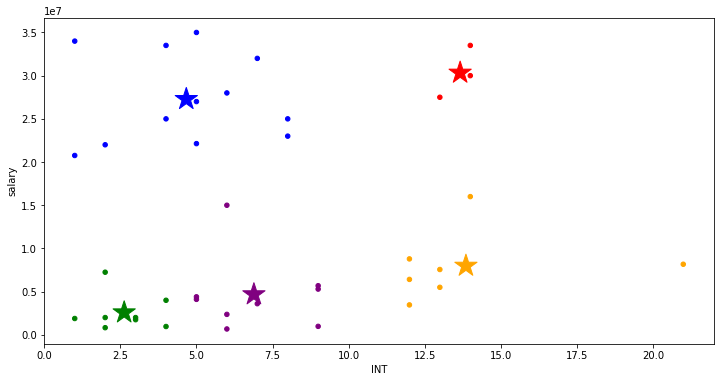

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'INT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'INT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.443329907090261

In [18]:
silhouette_score(X, km.labels_)

0.46888395260703203